In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [183]:
df ["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df ["TotalCharges"] = df ["TotalCharges"].astype("float")

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [185]:
df.isnull().sum().sum()

np.int64(0)

In [186]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [187]:
df["customerID"].duplicated().sum()

np.int64(0)

In [188]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

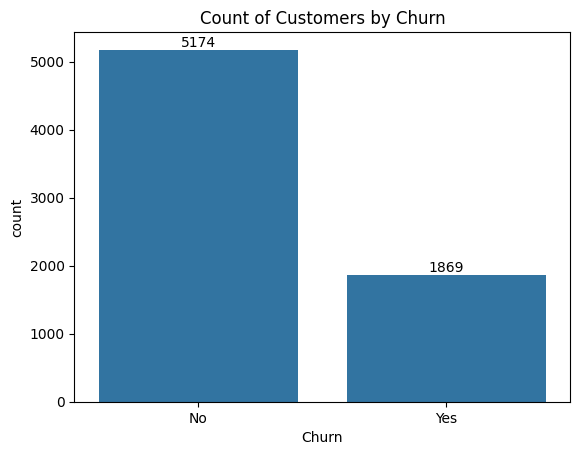

In [189]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

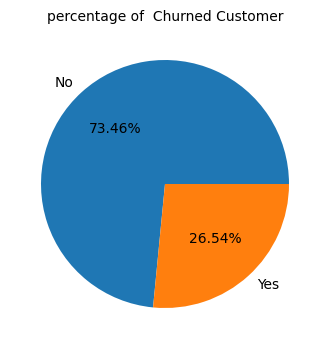

In [190]:
plt.figure(figsize =(4,5))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'] ,labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of  Churned Customer", fontsize=10)
plt.show()


from given pie chart we can conclude that 26.54% of our customers have churned out. now let's  explore the reason behind it.

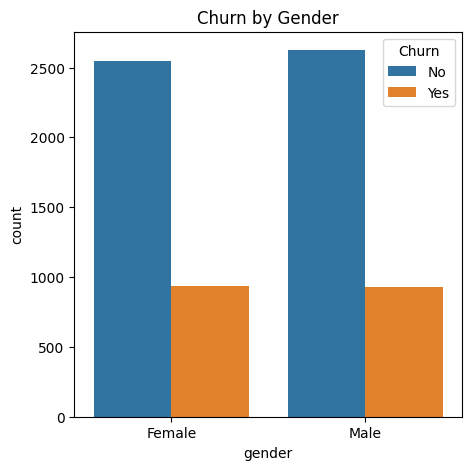

In [191]:
plt.figure(figsize=(5,5))
sns.countplot(x = "gender",data=df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

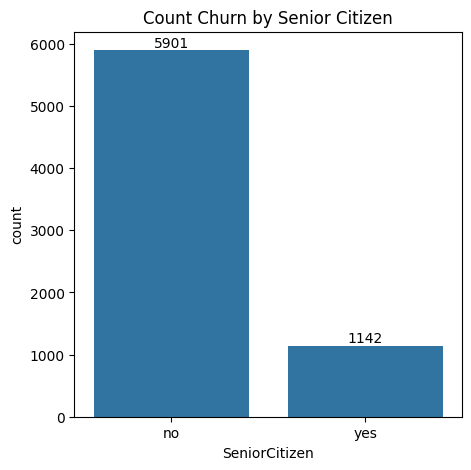

In [192]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Churn by Senior Citizen")
plt.show()

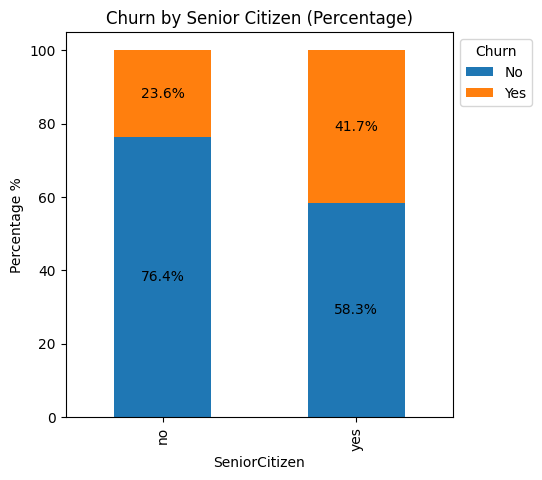

In [193]:
# Build contingency table
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentages (row-wise)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

ax = ct_pct.plot(kind='bar', stacked=True, figsize=(5,5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2, y + height/2,
                f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.title("Churn by Senior Citizen (Percentage)")
plt.ylabel("Percentage %")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn" , bbox_to_anchor = (1,1))
plt.show()


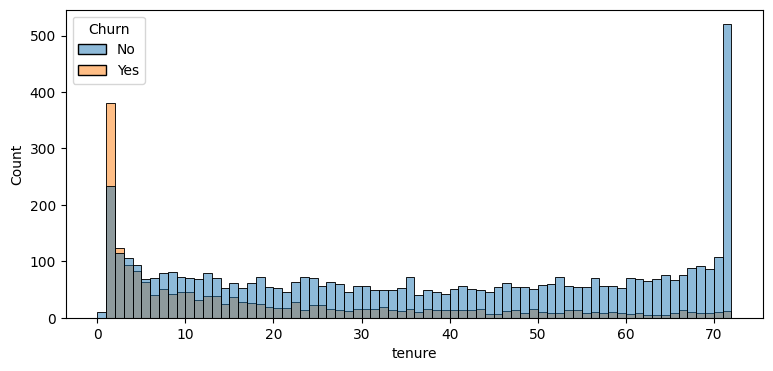

In [194]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

people who have used our services for a long time have stayed and people who have used our services for 1 oe 2 months have churned

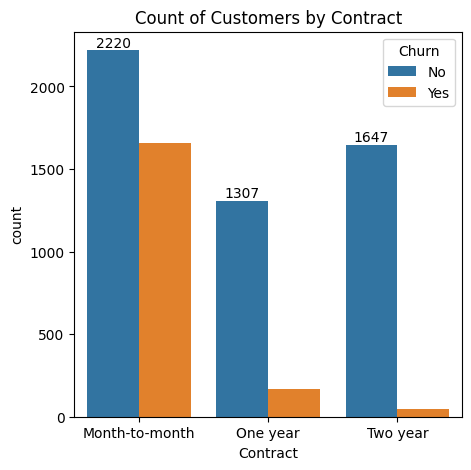

In [195]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "Contract",data=df ,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 year of contract

In [196]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

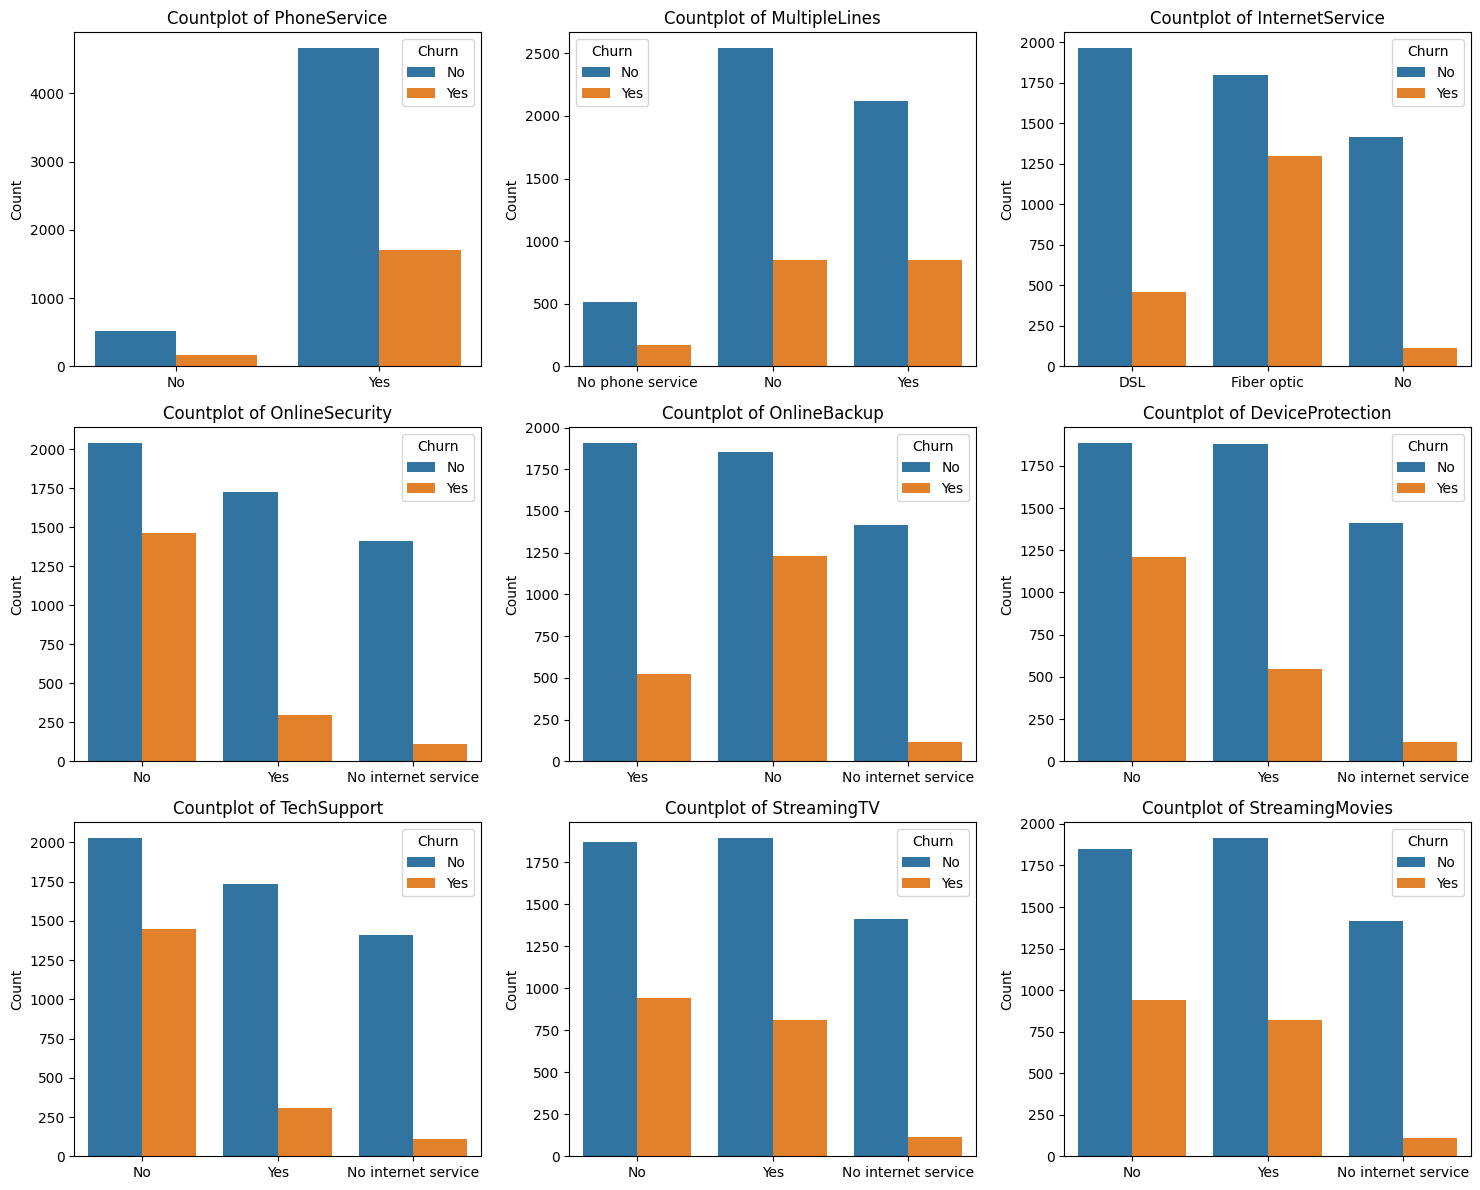

In [197]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid (3 rows × 3 cols for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")  # optional: cleaner look
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


churn patterns across customer offerings. Fiber optic internet users show the highest churn compared to DSL or no internet service. Customers lacking add‑on services such as OnlineSecurity, TechSupport, and DeviceProtection are more likely to churn, while those subscribed to these features tend to stay.

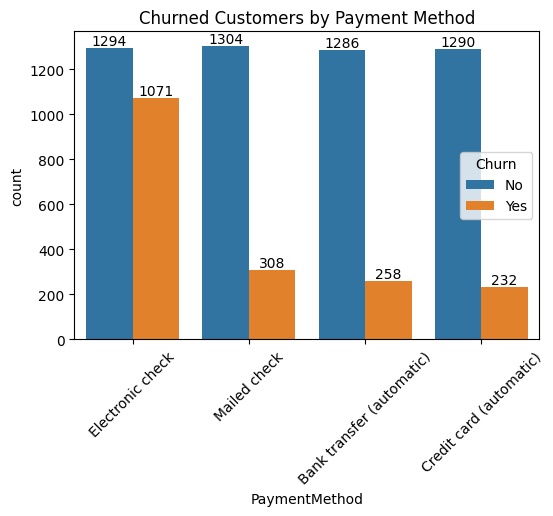

In [198]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod",data=df ,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he is using electronic check as a payment method.

# Logistic Regression Implementation

## STEP 1: IMPORT NECESSARY LIBRARIES

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("Libraries imported successfully")

Libraries imported successfully


## Step 2: Load Prepared Data
Loading the customer churn dataset.

In [200]:
# LOAD AND CLEAN DATA
df = pd.read_csv('Customer Churn.csv')

# Fix TotalCharges column (from previous EDA)
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

print("Dataset loaded successfully")
print("Number of customers:", df.shape[0])
print("Number of features:", df.shape[1])

Dataset loaded successfully
Number of customers: 7043
Number of features: 21


## Step 3: Select More Features (7 Important Features)
Based on EDA and common sense, we select these 7 features:

1. **tenure**: Customer loyalty (months)
2. **MonthlyCharges**: Monthly payment
3. **TotalCharges**: Total payment
4. **Contract**: Type of contract
5. **InternetService**: Type of internet
6. **TechSupport**: Has tech support?
7. **PaperlessBilling**: Paperless billing?

These should give better accuracy than just 3 features.

In [201]:
# SELECT FEATURES
features = [
    'tenure',            # How long customer stayed
    'MonthlyCharges',    # Monthly payment
    'TotalCharges',      # Total payment
    'Contract',          # Contract type
    'InternetService',   # Internet type
    'TechSupport',       # Tech support
    'PaperlessBilling'   # Paperless billing
]

X = df[features]
y = df['Churn']

print("Selected 7 features for prediction:")
for i, feature in enumerate(features, 1):
    print(f"{i}. {feature}")

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

Selected 7 features for prediction:
1. tenure
2. MonthlyCharges
3. TotalCharges
4. Contract
5. InternetService
6. TechSupport
7. PaperlessBilling

X shape: (7043, 7)
y shape: (7043,)


## Step 4: Convert Text to Numbers
Converting categorical text data to numerical values for logistic regression.

In [202]:
# CONVERT TEXT TO NUMBERS
X_encoded = X.copy()

# Contract mapping
X_encoded['Contract'] = X_encoded['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# InternetService mapping
X_encoded['InternetService'] = X_encoded['InternetService'].map({
    'DSL': 0,
    'Fiber optic': 1,
    'No': 2
})

# TechSupport mapping
X_encoded['TechSupport'] = X_encoded['TechSupport'].map({
    'No': 0,
    'Yes': 1,
    'No internet service': 2
})

# PaperlessBilling mapping
X_encoded['PaperlessBilling'] = X_encoded['PaperlessBilling'].map({
    'No': 0,
    'Yes': 1
})

# Target variable
y_encoded = y.map({'No': 0, 'Yes': 1})

print("Data encoding completed")
print("\nEncoding details:")
print("Contract: Month-to-month=0, One year=1, Two year=2")
print("InternetService: DSL=0, Fiber optic=1, No=2")
print("TechSupport: No=0, Yes=1, No internet service=2")
print("PaperlessBilling: No=0, Yes=1")
print("Churn: No=0, Yes=1")

Data encoding completed

Encoding details:
Contract: Month-to-month=0, One year=1, Two year=2
InternetService: DSL=0, Fiber optic=1, No=2
TechSupport: No=0, Yes=1, No internet service=2
PaperlessBilling: No=0, Yes=1
Churn: No=0, Yes=1


## Step 4.5: Data Enhancement and Preprocessing
Enhancing data quality for better model performance

In [203]:
# Import enhancement libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class balancing
print("Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Feature scaling
print("Applying feature scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

print(f"Original data shape: {X_encoded.shape}")
print(f"Balanced data shape: {X_resampled.shape}")
print("Data enhancement completed successfully")

Applying SMOTE for class balancing...
Applying feature scaling...
Original data shape: (7043, 7)
Balanced data shape: (10348, 7)
Data enhancement completed successfully


## Step 5: Split Data
Split data into training (80%) and testing (20%) sets.

In [204]:
# Improved train/test split with stratification
from sklearn.model_selection import StratifiedShuffleSplit

print("Creating stratified train/test split...")
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X_scaled, y_resampled))

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

print("Stratified data split completed")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Show churn distribution
churn_rate = (y_train == 1).mean() * 100
print(f"\nChurn rate in training data: {churn_rate:.1f}%")

Creating stratified train/test split...
Stratified data split completed
Training samples: 8278
Testing samples: 2070
Number of features: 7

Churn rate in training data: 50.0%


## Step 6: Hyperparameter Tuning for Logistic Regression
Finding optimal parameters for maximum accuracy

In [205]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Extended hyperparameter tuning
print("Starting comprehensive hyperparameter tuning...")

param_grid_extended = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [2000]
}

# Use extended grid
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_extended,
    cv=10,  # Increased CV folds
    scoring='accuracy',
    n_jobs=-1
)


grid_search.fit(X_train, y_train)  # Use X_train, y_train instead of X_scaled, y_resampled
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Create final model with best parameters
model = LogisticRegression(**best_params, random_state=42)

Starting comprehensive hyperparameter tuning...
Best parameters found: {'C': 0.1, 'max_iter': 2000, 'solver': 'liblinear'}


## Step 7: Build Logistic Regression Model
Creating and training the logistic regression model with 7 features.

In [206]:
# Train the model

model.fit(X_train, y_train)

print("Model trained successfully")
print(f"Number of coefficients: {len(model.coef_[0])}")
print(f"Model converged in {model.n_iter_[0]} iterations")

Model trained successfully
Number of coefficients: 7
Model converged in 6 iterations


## Step 8: Make Predictions
Using the trained model to predict churn for test data.

In [207]:
# MAKE PREDICTIONS
y_pred = model.predict(X_test)

# Calculate basic metrics
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Predictions completed")
print(f"Logistic Regression Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
# Calculate additional metrics for Logistic Regression
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)


Predictions completed
Logistic Regression Accuracy: 0.784 (78.4%)


## Step 9: Classification Report
Detailed report showing precision, recall, and F1-score for each class.

In [208]:
# GENERATE CLASSIFICATION REPORT
print("\nClassification Report:")
print("-" * 52)
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print(report)


Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.82      0.73      0.77      1035
       Churn       0.76      0.84      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



## Step 10: Confusion Matrix Visualization

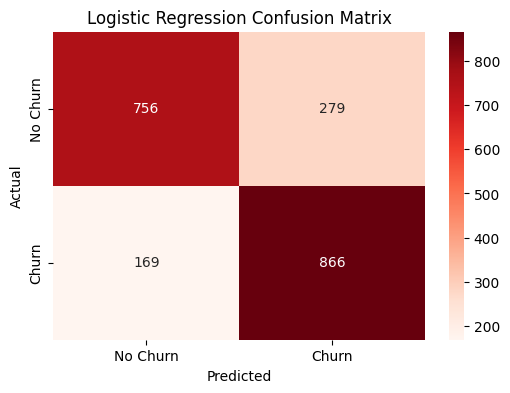

In [209]:
# Logistic Regression Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Step 11: Analyze Predictions
Looking at where the model made correct and incorrect predictions.

In [210]:
# ANALYZE PREDICTION RESULTS
# Create a comparison dataframe
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Correct': y_test.values == y_pred
})

# Count correct and incorrect predictions
correct_count = results_df['Correct'].sum()
incorrect_count = len(results_df) - correct_count

print(f"\nPrediction Analysis:")
print(f"Total predictions: {len(results_df)}")
print(f"Correct predictions: {correct_count} ({correct_count/len(results_df)*100:.1f}%)")
print(f"Incorrect predictions: {incorrect_count} ({incorrect_count/len(results_df)*100:.1f}%)")

# Show some misclassified examples
misclassified = results_df[results_df['Correct'] == False]
print(f"\nNumber of misclassified customers: {len(misclassified)}")

if len(misclassified) > 0:
    print("\nFirst 5 misclassified customers:")
    for i in range(min(5, len(misclassified))):
        idx = misclassified.index[i]
        actual = "Churn" if misclassified.iloc[i]['Actual'] == 1 else "No Churn"
        predicted = "Churn" if misclassified.iloc[i]['Predicted'] == 1 else "No Churn"
        print(f"Customer {i+1}: Actual={actual}, Predicted={predicted}")


Prediction Analysis:
Total predictions: 2070
Correct predictions: 1622 (78.4%)
Incorrect predictions: 448 (21.6%)

Number of misclassified customers: 448

First 5 misclassified customers:
Customer 1: Actual=Churn, Predicted=No Churn
Customer 2: Actual=No Churn, Predicted=Churn
Customer 3: Actual=Churn, Predicted=No Churn
Customer 4: Actual=Churn, Predicted=No Churn
Customer 5: Actual=No Churn, Predicted=Churn


## Step 12: Feature Importance
Understanding which features are most important for predicting churn.

In [211]:
# FEATURE IMPORTANCE ANALYSIS
# Get the feature names and coefficients
feature_names = X_encoded.columns.tolist()
coefficients = model.coef_[0]

# Create a dataframe for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Value': abs(coefficients)
})

# Sort by absolute value
feature_importance = feature_importance.sort_values('Absolute_Value', ascending=False)

print("\nFEATURE IMPORTANCE ANALYSIS")
print("=" * 50)
print("\nFeature Coefficients from Logistic Regression:")
print(feature_importance.to_string(index=False))

print("\nInterpretation:")
print("• Positive coefficient: Increases probability of churn")
print("• Negative coefficient: Decreases probability of churn")
print("• Larger absolute value: Stronger influence on prediction")

print("\nMost Important Features:")
for i, row in feature_importance.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']}: {impact} churn probability (coefficient: {row['Coefficient']:.3f})")


FEATURE IMPORTANCE ANALYSIS

Feature Coefficients from Logistic Regression:
         Feature  Coefficient  Absolute_Value
          tenure    -1.335681        1.335681
        Contract    -0.949410        0.949410
     TechSupport    -0.863193        0.863193
    TotalCharges     0.817316        0.817316
 InternetService     0.323561        0.323561
  MonthlyCharges     0.191049        0.191049
PaperlessBilling    -0.014301        0.014301

Interpretation:
• Positive coefficient: Increases probability of churn
• Negative coefficient: Decreases probability of churn
• Larger absolute value: Stronger influence on prediction

Most Important Features:
tenure: decreases churn probability (coefficient: -1.336)
Contract: decreases churn probability (coefficient: -0.949)
TechSupport: decreases churn probability (coefficient: -0.863)
TotalCharges: increases churn probability (coefficient: 0.817)
InternetService: increases churn probability (coefficient: 0.324)
MonthlyCharges: increases churn pr

# SVM Model Implementation

### Step 1: Import Required Libraries

In [212]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

print("SVM libraries imported successfully")

SVM libraries imported successfully


### Step 2: Create and Train SVM Model

Creating and training the Support Vector Machine model with RBF kernel.

In [213]:
# Create SVM model
svm_model = SVC(
    random_state=42,
    probability=True,
    class_weight='balanced',  # Handle class imbalance in customer churn dataset
    C=1.0,                    # Regularization parameter
    kernel='rbf'              # Radial basis function kernel
)

# Train SVM model
svm_model.fit(X_train, y_train)

print("SVM model trained successfully")
print(f"Number of support vectors: {svm_model.n_support_}")

SVM model trained successfully
Number of support vectors: [1849 1834]


### Step 3: Making Predictions with SVM

Generating predictions on test data to evaluate model performance.

In [214]:
# Make predictions

y_pred_svm = svm_model.predict(X_test)

# Calculate basic metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Predictions completed")
print(f"SVM Accuracy: {accuracy_svm:.3f} ({accuracy_svm*100:.1f}%)")

# Generate classification report for SVM
print("\nSVM Classification Report:")
print("-" * 52)
svm_report = classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn'])
print(svm_report)

SVM Predictions completed
SVM Accuracy: 0.788 (78.8%)

SVM Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.82      0.74      0.78      1035
       Churn       0.76      0.84      0.80      1035

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



### Step 4: SVM Implementation Complete

SVM model implementation completed. Results stored for final comparison with Logistic Regression and Random Forest.


In [215]:
print("\nSVM implementation completed - ready for final algorithm comparison.")


SVM implementation completed - ready for final algorithm comparison.


### Step 5: SVM Confusion Matrix Visualization

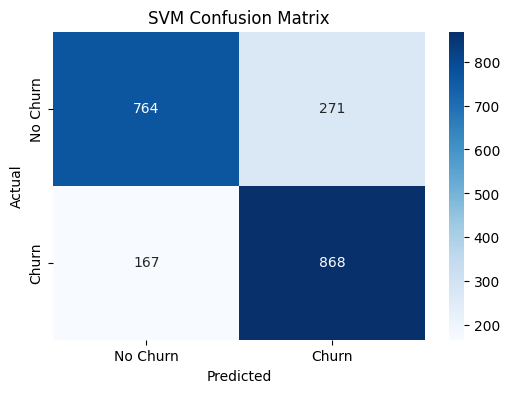

In [216]:
# SVM Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate additional metrics for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

## Random Forest Implementation
Now we'll implement Random Forest Classifier to compare performance with Logistic Regression and SVM.

### Step 1: Import Required Libraries

In [217]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Implementing Random Forest Classifier...")

Implementing Random Forest Classifier...


### Step 2: Create and Train Random Forest Model
Random Forest is an ensemble method that uses multiple decision trees.

In [218]:
# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=10           # Limit tree depth
)

# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully")

Random Forest model trained successfully


### Step 3: Make predictions with Random Forest

In [219]:
# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate basic metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Predictions completed")
print(f"Random Forest Accuracy: {accuracy_rf:.3f} ({accuracy_rf*100:.1f}%)")

# Generate classification report for Random Forest
print("\nRandom Forest Classification Report:")
print("-" * 52)
rf_report = classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn'])
print(rf_report)

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_,
}).sort_values('Importance', ascending=False)

print("\nRANDOM FOREST FEATURE IMPORTANCE:")
print(feature_importance_rf)

Random Forest Predictions completed
Random Forest Accuracy: 0.809 (80.9%)

Random Forest Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.85      0.75      0.80      1035
       Churn       0.78      0.87      0.82      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070


RANDOM FOREST FEATURE IMPORTANCE:
            Feature  Importance
3          Contract    0.250066
5       TechSupport    0.184942
1    MonthlyCharges    0.173842
0            tenure    0.161854
2      TotalCharges    0.156670
4   InternetService    0.062166
6  PaperlessBilling    0.010459


### Step 4: Random Forest Confusion Matrix Visualization

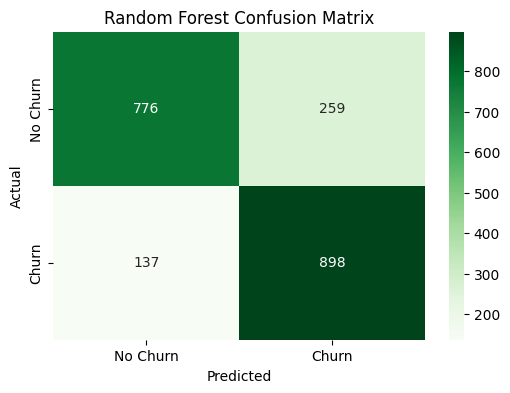

In [220]:
# Random Forest Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate additional metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Model Performance Visualizations and Final Comparison

Successfully implemented Logistic Regression, SVM, and Random Forest. Now lets make a final Comparision of all these algorithms with the Model Performance Visualizations

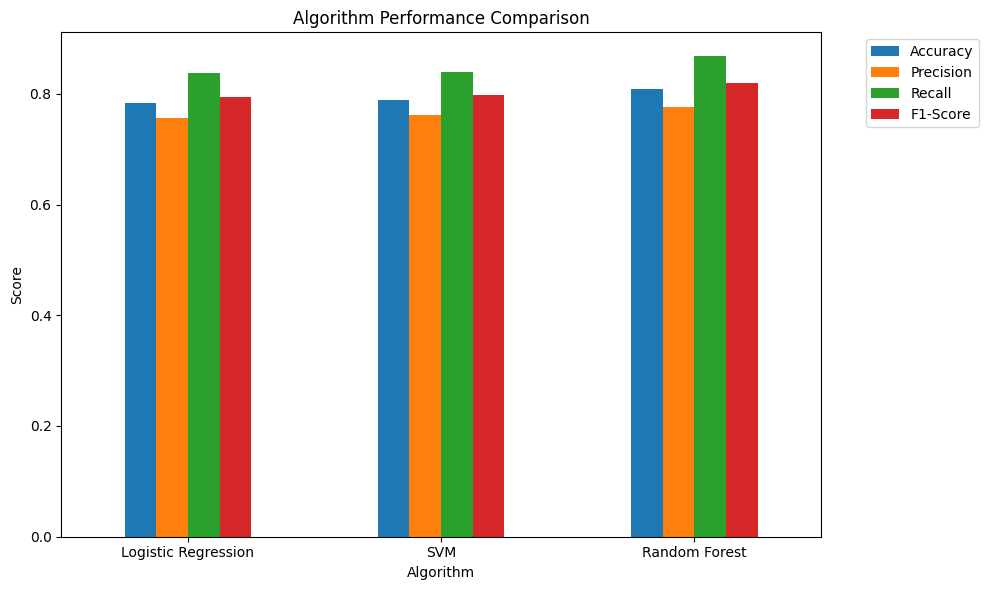

In [221]:
# Create comparison visualization before final summary
# Calculate all remaining metrics
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Overall Algorithm Comparison
metrics_comparison = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_svm, accuracy_rf],
    'Precision': [precision_lr, precision_svm, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_rf],
    'F1-Score': [f1_lr, f1_svm, f1_rf]
})

fig, ax = plt.subplots(figsize=(10, 6))
metrics_comparison.set_index('Algorithm').plot(kind='bar', ax=ax)
plt.title('Algorithm Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 6: Final Comparison Summary

In [222]:
### FINAL THREE-WAY ALGORITHM COMPARISON ###


print("\n" + "="*70)
print("FINAL THREE-ALGORITHM COMPARISON SUMMARY")
print("="*70)

# Create comprehensive summary table
summary_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Best For"],
    "Logistic Regression": [
        f"{accuracy:.3f}",
        f"{precision_lr:.3f}",
        f"{recall_lr:.3f}",
        f"{f1_lr:.3f}",
        "Linear relationships, interpretability"
    ],
    "Random Forest": [
        f"{accuracy_rf:.3f}",
        f"{precision_rf:.3f}",
        f"{recall_rf:.3f}",
        f"{f1_rf:.3f}",
        "Non-linear patterns, feature importance"
    ],
    "SVM": [
        f"{accuracy_svm:.3f}",
        f"{precision_svm:.3f}",
        f"{recall_svm:.3f}",
        f"{f1_svm:.3f}",
        "Complex boundaries, balanced datasets"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nAlgorithm Performance Comparison:")
print(summary_df.to_string(index=False))

# Find best algorithm
algorithms = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy, accuracy_rf, accuracy_svm]
best_idx = accuracies.index(max(accuracies))

print(f"\n🏆 Best Algorithm: {algorithms[best_idx]}")
print(f"   Accuracy: {max(accuracies)*100:.1f}%")

# Performance ranking
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
print("\nPerformance Ranking:")
for i, idx in enumerate(sorted_indices, 1):
    print(f"{i}. {algorithms[idx]}: {accuracies[idx]*100:.1f}%")

print("\n" + "="*70)
print("PROJECT COMPLETED WITH ALL 3 ALGORITHMS IMPLEMENTED!")
print("="*70)


FINAL THREE-ALGORITHM COMPARISON SUMMARY

Algorithm Performance Comparison:
   Metric                    Logistic Regression                           Random Forest                                   SVM
 Accuracy                                  0.784                                   0.809                                 0.788
Precision                                  0.756                                   0.776                                 0.762
   Recall                                  0.837                                   0.868                                 0.839
 F1-Score                                  0.794                                   0.819                                 0.799
 Best For Linear relationships, interpretability Non-linear patterns, feature importance Complex boundaries, balanced datasets

🏆 Best Algorithm: Random Forest
   Accuracy: 80.9%

Performance Ranking:
1. Random Forest: 80.9%
2. SVM: 78.8%
3. Logistic Regression: 78.4%

PROJECT COMPLETED 